## Single Shot Detector (SSD)

**COCO** stands for **Common Objects in Context**, as the image dataset was created with the goal of advancing image recognition. The COCO dataset contains challenging, high-quality visual datasets for computer vision, mostly state-of-the-art neural networks.

**frozen_inference_graph.pb**, is a frozen graph that cannot be trained anymore

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'
label='labels.txt'

In [3]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
class_labels=[]

with open(label,'rt') as file:
    class_labels=file.read().rstrip('\n').split('\n')

In [5]:
print(class_labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
len(class_labels)

80

In [7]:
255/2

127.5

In [8]:
model.setInputSize(320,320) # set size for image frame
model.setInputScale(1.0/127.5)   # set scale value for frame
model.setInputMean((127.5,127,5,127.5))         # set mean value for frame 
model.setInputSwapRB(True)  # It will swap R and B in BGR color channel and make it RGB


< cv2.dnn.Model 00000286EC6B6C90>

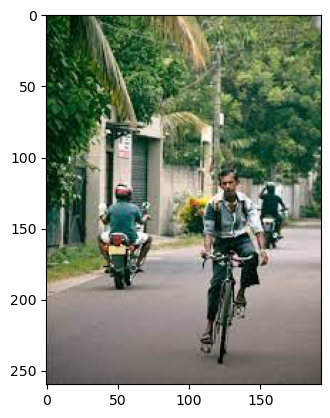

In [9]:
img=cv2.imread('man with.jpeg',1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [10]:
class_index,confidence,bbox=model.detect(img,confThreshold=0.5)

In [11]:
print(class_index)

[1 1 2 4 2 1 4 4]


In [12]:
print(confidence)

[0.7821964  0.75455683 0.65793294 0.65620077 0.61558944 0.60496694
 0.564398   0.55024636]


In [13]:
print(type(confidence))

<class 'numpy.ndarray'>


In [14]:
print(bbox)

[[102 114  51 115]
 [ 36 117  38  70]
 [109 169  27  77]
 [149 128  20  36]
 [104 143  49 101]
 [149 121  20  37]
 [ 36 152  39  43]
 [ 36 120  38  72]]


In [15]:
print(type(bbox))

<class 'numpy.ndarray'>


In [16]:
font_scale=0.5
font=cv2.FONT_HERSHEY_SIMPLEX

for classind,conf,box in zip(class_index.flatten(),confidence.flatten(),bbox ):
    cv2.rectangle(img,box,(255,0,0),1)
    cv2.putText(img,class_labels[classind-1],(box[0]+10,box[1]+40),font,font_scale,(0,255,0),1)

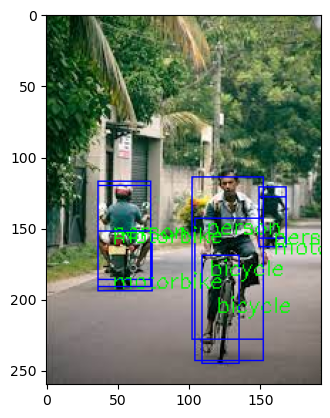

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))